In [1]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt

# CDD-CESM

This dataset is an Egyptian dataset composed of 2006 images IN TOTAL, composed of low-energy and constrast-enhanced spectral mamography, aka dual energy.

- 1003 low-energy images
- 1003 CESM

The number of patients is 326. Usually one patient has 8 images:
- 4 images per modality
    - 2 lateralities (L, R) and 2 views (CC, MLO)

Nevertheless, there are some exceptions so the number of total images is not the total hypothetic maximum 2068.

Besides the images we have:
- ROI of the findings: coordinates of the geometrical figure (ellipse, poligon, etc.)
- Biopsy results
- finding type: mass, asymmetry, 

## Can CCD-CESM be combined with the INCan DE dataset?
The project should be able to go by itself (no need of additional dataset) but it could be a nice addition to have another underrepresented population (mexican) in the study.

### Similarities
- Both dataset are, in theory, from the <u> same clincial protocol</u>, so it should be possible.
- Both datasets contain handmade segmentations of the findings.

# Differences
- The mexican dataset have the raw images available, so all the original pixel intensities are available. The egyptian dataset has the images already preprocessed to 8bits.

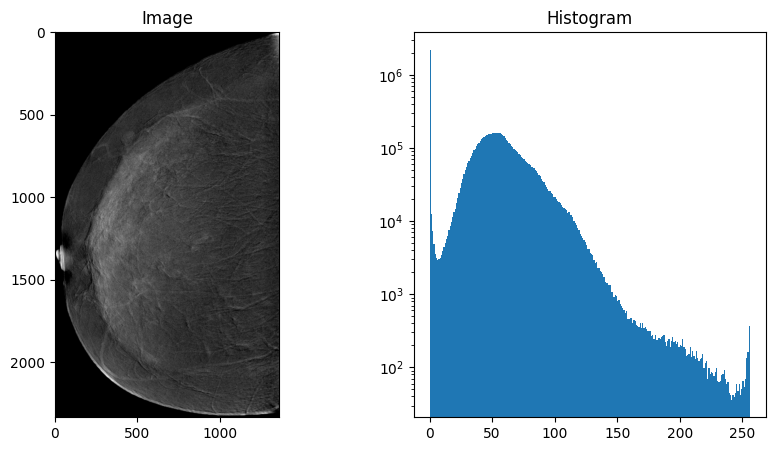

In [3]:
# First, we make sure bothdatasets have similar pixel information:
image_dir = repo_path / 'data/CDD-CESM/images/substracted'
# get all paths
image_paths = [str(path) for path in image_dir.glob('*.jpg')]

# read exmaple
image = cv.imread(image_paths[0])
# plot image and histogram
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image)
ax[0].set_title('Image')
ax[1].hist(image.ravel(),256,[0,256], log=True)
ax[1].set_title('Histogram')
plt.show()